# HR Analytics Project- Understanding the Attrition in HR

# Data description

The data given has row: 1470 and column:35. We need to build the model to predict the attrition rate of the employee.
        
This is categorical problem. There are 34 attributes given in the data.

The attrition will be dependent variable and rest will be independent variables.

In [210]:
import pandas as pd
df=pd.read_csv("C:\\Users\\admin\\Downloads\\ibm-hr-analytics-employee-attrition-performance (5).zip")

In [211]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [212]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [213]:
df.shape

(1470, 35)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The data set non-null values, 

It has so many object values, need to be converted.

In [215]:
df['Attrition']=df['Attrition'].replace({'Yes':1, 'No':0})

EmployeeCount is number of employee, which is same '1'. Also Employee number, Over18

All these attributes has no influence on attrition rate.

In [216]:
data=df.drop(columns='EmployeeNumber')

In [217]:
data_1=data.drop(columns='EmployeeCount')

In [218]:
data1=data_1.drop(columns='Over18')

In [219]:
data1.shape

(1470, 32)

In [220]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [221]:
data1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [222]:
data1.shape

(1470, 32)

In [223]:
data1['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [224]:
mapping={'Travel_Rarely':'1',
        'Travel_Frequently':'2',
        'Non-Travel':'0'}

In [225]:
data1['BusinessTravel']=data1['BusinessTravel'].map(mapping)

In [226]:
data1['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [227]:
mapping={'Sales':'1',
        'Research & Development':'2',
        'Human Resources':'0'}

In [228]:
data1['Department']=data1['Department'].map(mapping)

In [229]:
data1['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [230]:
mapping={'Life Sciences':'0',
        'Other':'1',
        'Medical':'2',
         'Marketing':'3',
         'Technical Degree':'4',
         'Human Resources':'5'}

In [231]:
data1['EducationField']=data1['EducationField'].map(mapping)

In [232]:
data1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [233]:
data1['Gender']=data1['Gender'].replace({'Female':1, 'Male':0})

In [234]:
data1['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [235]:
mapping={'Sales Executive':'0',
        'Research Scientist':'1',
        'Laboratory Technician':'2',
        'Manufacturing Director':'3',
        'Healthcare Representative':'4',
        'Manager':'5',
        'Sales Representative':'6',
        'Research Director':'7',
        'Human Resources':'8'}

In [236]:
data1['JobRole']=data1['JobRole'].map(mapping)

In [237]:
data1['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [238]:
data1['MaritalStatus']=data1['MaritalStatus'].replace({'Single':1, 'Married':0, 'Divorced':2})

In [239]:
data1['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [240]:
data1['OverTime']=data1['OverTime'].replace({'Yes':1, 'No':0})

Coverted the strings into numbers
'BusinessTravel'='Travel_Rarely':'1','Travel_Frequently':'2','Non-Travel':'0'
            
Department= 'Sales':'1', Research & Development':'2',Human Resources':'0'
        
Education Field='Life Sciences':'0','Other':'1','Medical':'2','Marketing':'3',Technical Degree':'4','Human Resources':'5 

Gender= Male=0, Female=1

Attrition= Yes:1, No:0

JobRole= 'Sales Executive':'0',
        'Research Scientist':'1',
        'Laboratory Technician':'2',
        'Manufacturing Director':'3',
        'Healthcare Representative':'4',
        'Manager':'5',
        'Sales Representative':'6',
        'Research Director':'7',
        'Human Resources':'8'
        
 Marital Status='Single':1, 'Married':0, 'Divorced':2
 
 Overtime='Yes':1, 'No':0
 
 

In [241]:
data1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,0,2,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,0,3,0,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,1,4,0,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,0,4,1,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,2,1,0,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [387]:
data1.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.036311,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.011716,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.001851,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016547,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.000508,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,0.036311,-0.029453,0.011716,0.001851,0.016547,-0.000508,1.000000,0.000478,-0.017960,0.039403,...,-0.022868,NaN,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,0.000478,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,-0.017960,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,0.039403,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

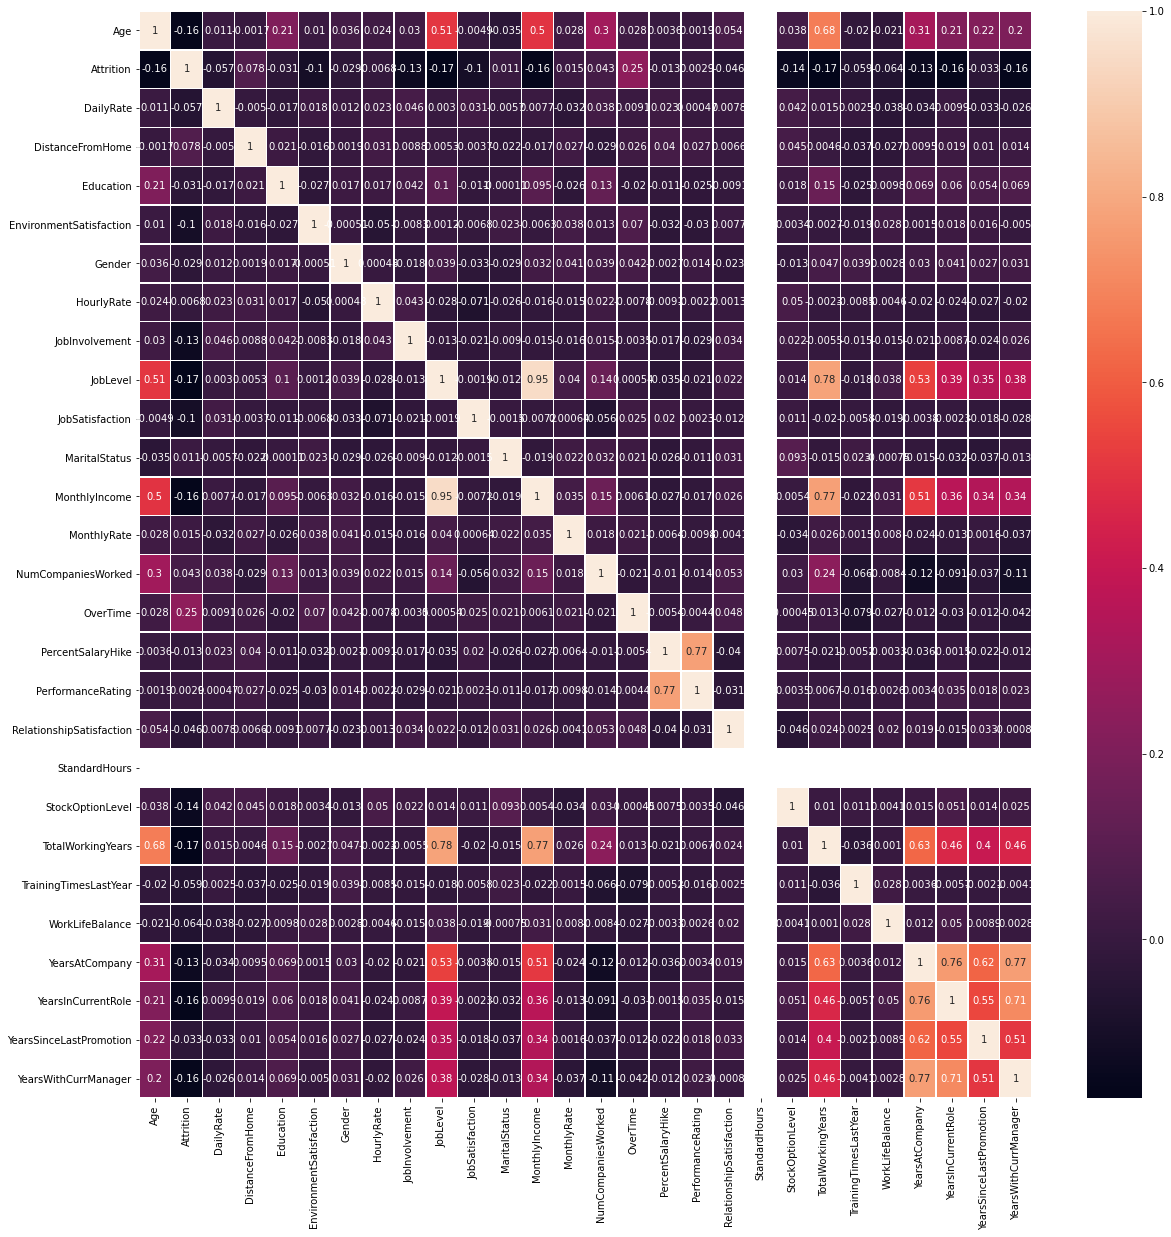

In [388]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data1.corr(),annot=True, linewidth=0.5,)

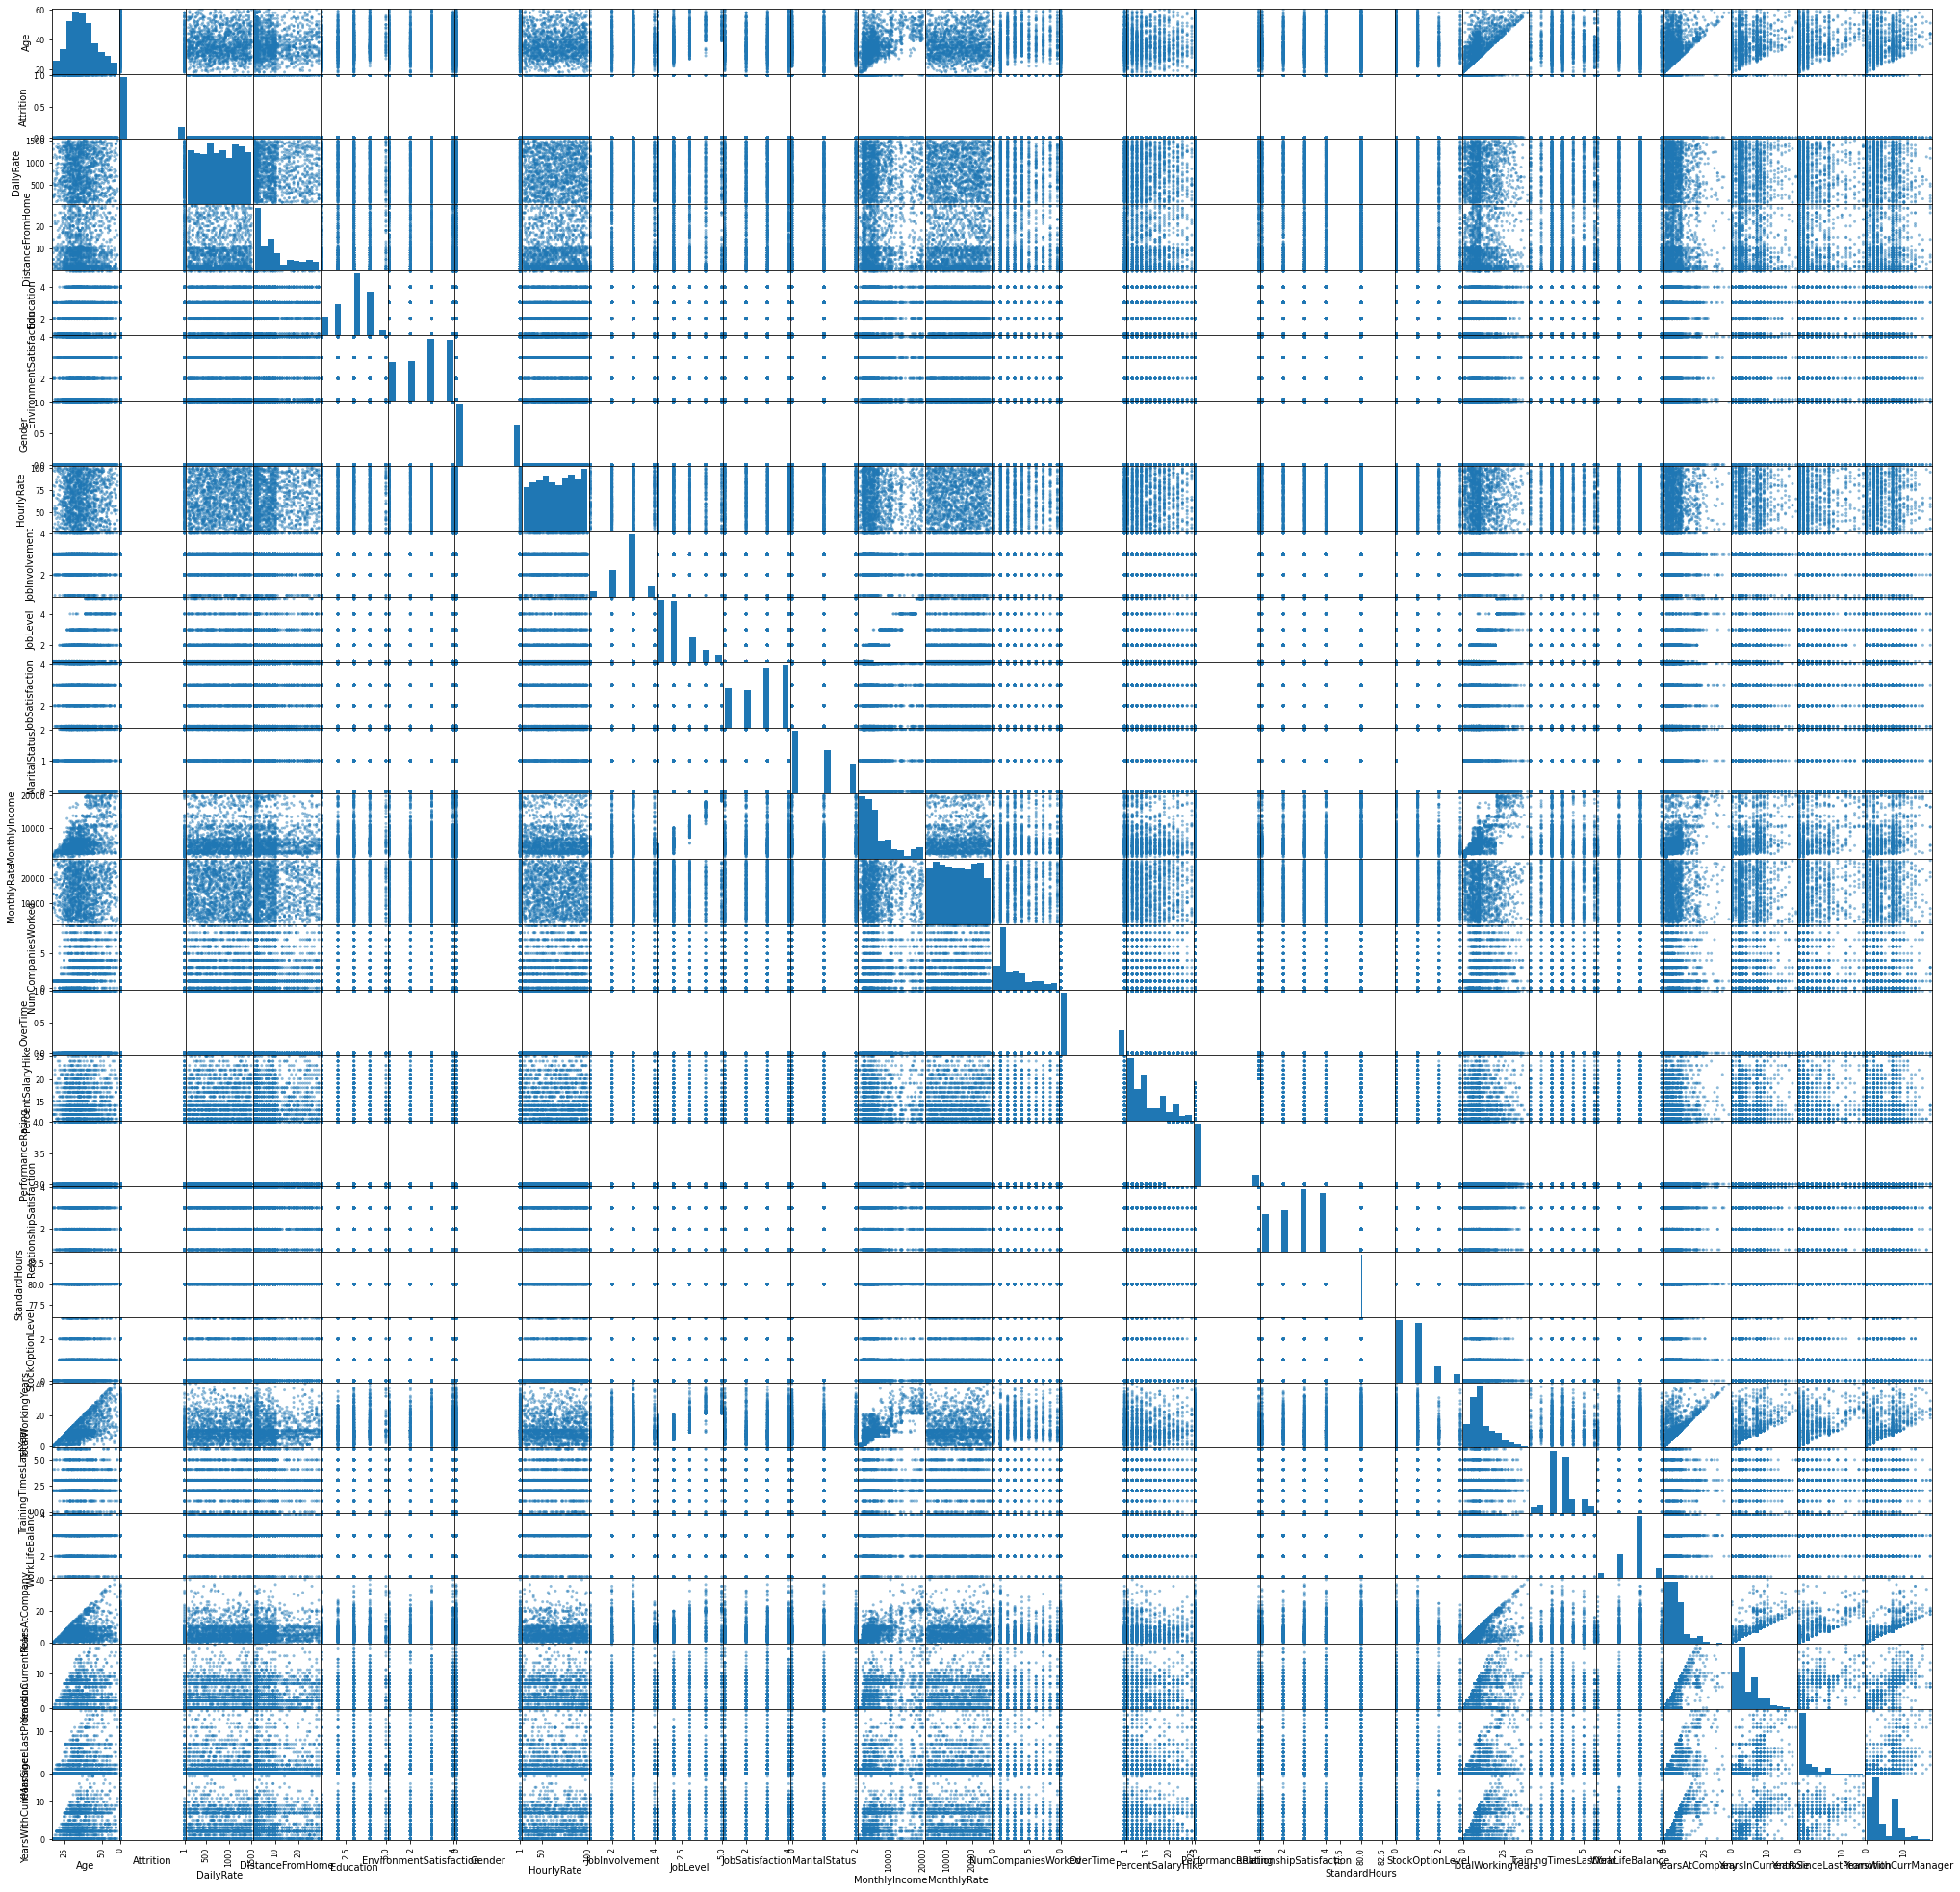

In [391]:
scatter_matrix(data1, figsize=(35,35))
plt.show()

There is multicollinerity in the data set.

Data Set is too big to analyze so using one of the feature selection technique.


# Using SelectKBest feature Selection method

Selecting best 17 parameters

In [242]:
X=data1.drop(columns='Attrition')
Y=data1['Attrition']

In [243]:
from sklearn.feature_selection import SelectKBest, f_classif

In [244]:
best_features=SelectKBest(score_func=f_classif, k=17)

In [245]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   int64 
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [246]:
data1['JobRole']=data1['JobRole'].fillna(data['JobRole'].mode(0)[0])

In [247]:
data1['BusinessTravel']=data1['BusinessTravel'].fillna(data['BusinessTravel'].mode(0)[0])

In [248]:
data1['Department']=data1['Department'].fillna(data['Department'].mode(0)[0])

In [249]:
data1['EducationField']=data1['EducationField'].fillna(data['EducationField'].mode(0)[0])

In [250]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   int64 
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [256]:
fit=best_features.fit(X,Y)
data1_scores=pd.DataFrame(fit.scores_)
data1_column=pd.DataFrame(X.columns)


In [259]:
feature_scores=pd.concat([data1_column, data1_scores], axis=1)

In [260]:
feature_scores.columns=['feature_name', 'score']
print(feature_scores.nlargest(17,'score'))

               feature_name      score
18                 OverTime  94.656457
24        TotalWorkingYears  44.252491
11                 JobLevel  43.215344
28       YearsInCurrentRole  38.838303
15            MonthlyIncome  38.488819
0                       Age  38.175887
30     YearsWithCurrManager  36.712311
23         StockOptionLevel  28.140501
27           YearsAtCompany  27.001624
10           JobInvolvement  25.241985
1            BusinessTravel  24.068022
13          JobSatisfaction  15.890004
7   EnvironmentSatisfaction  15.855209
4          DistanceFromHome   8.968277
3                Department   8.836173
6            EducationField   8.401868
26          WorkLifeBalance   6.026116


In [261]:
new_x=df[['OverTime','TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','BusinessTravel','JobSatisfaction',
         'EnvironmentSatisfaction','DistanceFromHome','Department','EducationField','WorkLifeBalance']]

In [262]:
new_x

,OverTime,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,BusinessTravel,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,Department,EducationField,WorkLifeBalance
0,Yes,8,2,4,5993,41,5,0,6,3,Travel_Rarely,4,2,1,Sales,Life Sciences,1
1,No,10,2,7,5130,49,7,1,10,2,Travel_Frequently,2,3,8,Research & Development,Life Sciences,3
2,Yes,7,1,0,2090,37,0,0,0,2,Travel_Rarely,3,4,2,Research & Development,Other,3
3,Yes,8,1,7,2909,33,0,0,8,3,Travel_Frequently,3,4,3,Research & Development,Life Sciences,3
4,No,6,1,2,3468,27,2,1,2,3,Travel_Rarely,2,1,2,Research & Development,Medical,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,17,2,2,2571,36,3,1,5,4,Travel_Frequently,4,3,23,Research & Development,Medical,3
1466,No,9,3,7,9991,39,7,1,7,2,Travel_Rarely,1,4,6,Research & Development,Medical,3
1467,Yes,6,2,2,6142,27,3,1,6,4,Travel_Rarely,2,2,4,Research & Development,Life Sciences,3
1468,No,17,2,6,5390,49,8,0,9,2,Travel_Frequently,2,4,2,Sales,Medical,2


In [263]:
new_x.shape

(1470, 17)

In [264]:
new_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   OverTime                 1470 non-null   object
 1   TotalWorkingYears        1470 non-null   int64 
 2   JobLevel                 1470 non-null   int64 
 3   YearsInCurrentRole       1470 non-null   int64 
 4   MonthlyIncome            1470 non-null   int64 
 5   Age                      1470 non-null   int64 
 6   YearsWithCurrManager     1470 non-null   int64 
 7   StockOptionLevel         1470 non-null   int64 
 8   YearsAtCompany           1470 non-null   int64 
 9   JobInvolvement           1470 non-null   int64 
 10  BusinessTravel           1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  EnvironmentSatisfaction  1470 non-null   int64 
 13  DistanceFromHome         1470 non-null   int64 
 14  Department               1470 non-null  

In [265]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [266]:
new_x['OverTime']=new_x['OverTime'].replace({'Yes':1, 'No':0})

In [267]:
mapping={'Travel_Rarely':'1',
        'Travel_Frequently':'2',
        'Non-Travel':'0'}

In [268]:
new_x['BusinessTravel']=new_x['BusinessTravel'].map(mapping)

In [269]:
mapping={'Sales':'1',
        'Research & Development':'2',
        'Human Resources':'0'}

In [271]:
new_x['Department']=new_x['Department'].map(mapping)

In [272]:
mapping={'Life Sciences':'0',
        'Other':'1',
        'Medical':'2',
         'Marketing':'3',
         'Technical Degree':'4',
         'Human Resources':'5'}

In [273]:
new_x['EducationField']=new_x['EducationField'].map(mapping)

In [274]:
new_x

,OverTime,TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,BusinessTravel,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,Department,EducationField,WorkLifeBalance
0,1,8,2,4,5993,41,5,0,6,3,1,4,2,1,1,0,1
1,0,10,2,7,5130,49,7,1,10,2,2,2,3,8,2,0,3
2,1,7,1,0,2090,37,0,0,0,2,1,3,4,2,2,1,3
3,1,8,1,7,2909,33,0,0,8,3,2,3,4,3,2,0,3
4,0,6,1,2,3468,27,2,1,2,3,1,2,1,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,17,2,2,2571,36,3,1,5,4,2,4,3,23,2,2,3
1466,0,9,3,7,9991,39,7,1,7,2,1,1,4,6,2,2,3
1467,1,6,2,2,6142,27,3,1,6,4,1,2,2,4,2,0,3
1468,0,17,2,6,5390,49,8,0,9,2,2,2,4,2,1,2,2


In [278]:
new_x.skew()

OverTime                   0.964489
TotalWorkingYears          1.117172
JobLevel                   1.025401
YearsInCurrentRole         0.917363
MonthlyIncome              1.369817
Age                        0.413286
YearsWithCurrManager       0.833451
StockOptionLevel           0.968980
YearsAtCompany             1.764529
JobInvolvement            -0.498419
BusinessTravel             0.082428
JobSatisfaction           -0.329672
EnvironmentSatisfaction   -0.321654
DistanceFromHome           0.958118
Department                -1.141828
EducationField             0.487091
WorkLifeBalance           -0.552480
dtype: float64

# Scaling Data

In [279]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(new_x)
x

array([[ 1.59174553, -0.42164246, -0.05778755, ..., -1.07417805,
        -1.02186266, -2.49382042],
       [-0.62824112, -0.1645114 , -0.05778755, ...,  0.68422032,
        -1.02186266,  0.33809616],
       [ 1.59174553, -0.55020799, -0.96148639, ...,  0.68422032,
        -0.32319377,  0.33809616],
       ...,
       [ 1.59174553, -0.67877352, -0.05778755, ...,  0.68422032,
        -1.02186266,  0.33809616],
       [-0.62824112,  0.7354473 , -0.05778755, ..., -1.07417805,
         0.37547512, -1.07786213],
       [-0.62824112, -0.67877352, -0.05778755, ...,  0.68422032,
         0.37547512,  1.75405446]])

# Train-Test Split

In [280]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [297]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.25,random_state=355)

# KNN algorithm

In [298]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [299]:
knn=KNeighborsClassifier()

In [300]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [301]:
y_predict=knn.predict(x_test)

In [302]:
accuracy_score(y_test, y_predict)

0.8369565217391305

In [303]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[300,   7],
       [ 53,   8]], dtype=int64)

In [304]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       307
           1       0.53      0.13      0.21        61

    accuracy                           0.84       368
   macro avg       0.69      0.55      0.56       368
weighted avg       0.80      0.84      0.79       368



In [296]:
from sklearn.model_selection import cross_val_score

In [386]:
cross_val=cross_val_score(knn,new_x,Y,cv=5)
cross_val.mean()

0.8190476190476191

In [324]:
from sklearn.model_selection import GridSearchCV

In [320]:
param_grid ={'algorithm':['kd_tree','brute'] , 'leaf_size':[10,11,14,18,20,25,30]}

In [325]:
grid_search = GridSearchCV(knn, param_grid)
grid.fit(x,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 14, 18, 20, 25, 30]})

In [326]:
grid_result = grid_search.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'algorithm': 'kd_tree', 'leaf_size': 10}


In [328]:
kn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=10)

In [329]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10)

In [333]:
y_predict1=kn.predict(x_test)

In [334]:
accuracy_score(y_test, y_predict1)

0.8369565217391305

In [335]:
cfm=confusion_matrix(y_test,y_predict1)
cfm

array([[300,   7],
       [ 53,   8]], dtype=int64)

In [345]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       307
           1       0.53      0.13      0.21        61

    accuracy                           0.84       368
   macro avg       0.69      0.55      0.56       368
weighted avg       0.80      0.84      0.79       368



In [336]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.840287947346771


# Final Score of Knn after hypertunning is 84%

# Decision Tree Classifier

In [338]:
from sklearn.tree import DecisionTreeClassifier

In [339]:
tree=DecisionTreeClassifier()

In [340]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [341]:
tree.score(x_train,y_train)

1.0

In [342]:
y_pred=tree.predict(x_test)

In [343]:
accuracy_score(y_test,y_pred)

0.7880434782608695

In [344]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[272,  35],
       [ 43,  18]], dtype=int64)

In [346]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       307
           1       0.34      0.30      0.32        61

    accuracy                           0.79       368
   macro avg       0.60      0.59      0.60       368
weighted avg       0.78      0.79      0.78       368



In [385]:
cross_val=cross_val_score(tree,new_x,Y,cv=5)
cross_val.mean()

0.7938775510204081

In [353]:
grid_param1={'criterion':['gini','entropy'], 'max_depth':range(10,15),
           'min_samples_split':range(3,10)}

In [354]:
grid_search1=GridSearchCV(tree, param_grid=grid_param1, cv=5)

In [355]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_split': range(3, 10)})

In [356]:
grid_result1 = grid_search1.fit(x_train, y_train)
print('Best Params: ', grid_result1.best_params_)

Best Params:  {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 9}


In [358]:
tree1=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split= 9)

In [359]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=9)

In [360]:
tree1.score(x_train,y_train)

0.9491833030852994

In [362]:
y_pre=tree1.predict(x_test)

In [363]:
accuracy_score(y_test,y_pre)

0.8070652173913043

In [364]:
cm = confusion_matrix(y_test, y_pre)
cm

array([[277,  30],
       [ 41,  20]], dtype=int64)

In [366]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       307
           1       0.40      0.33      0.36        61

    accuracy                           0.81       368
   macro avg       0.64      0.62      0.62       368
weighted avg       0.79      0.81      0.80       368



# Final score of Decision Tree is 81%

# Logistic Regression

In [368]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [369]:
y_predict_test = classifier.predict(x_test)

In [371]:
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[299,   8],
       [ 43,  18]], dtype=int64)

In [373]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       307
           1       0.69      0.30      0.41        61

    accuracy                           0.86       368
   macro avg       0.78      0.63      0.67       368
weighted avg       0.84      0.86      0.84       368



In [375]:
cross_val=cross_val_score(classifier, new_x,Y,cv=5)
cross_val.mean()

0.8462585034013606

In [376]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search2 = GridSearchCV(classifier, param_grid=param)

In [377]:
grid_result = grid_search2.fit(x_train, y_train)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'C': 0.1}


In [379]:
clas=LogisticRegression(C=0.1)

In [380]:
clas.fit(x_train, y_train)

LogisticRegression(C=0.1)

In [381]:
y_predict_t = clas.predict(x_test)

In [382]:
cm = confusion_matrix(y_test, y_predict_t)
cm

array([[301,   6],
       [ 44,  17]], dtype=int64)

In [383]:
accuracy_score(y_test, y_predict_t)

0.8641304347826086

In [384]:
print(classification_report(y_test, y_predict_t))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       307
           1       0.74      0.28      0.40        61

    accuracy                           0.86       368
   macro avg       0.81      0.63      0.66       368
weighted avg       0.85      0.86      0.84       368



# Final score of Logistic Regression is 86%

# Random Forest

In [392]:
from sklearn.ensemble import RandomForestClassifier

In [393]:
clf=RandomForestClassifier()

In [394]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [396]:
y_pr=clf.predict(x_test)

In [397]:
accuracy_score(y_test, y_pr)

0.8505434782608695

In [398]:
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       307
           1       0.67      0.20      0.30        61

    accuracy                           0.85       368
   macro avg       0.76      0.59      0.61       368
weighted avg       0.83      0.85      0.81       368



In [399]:
cm_ = confusion_matrix(y_test, y_pr)
cm_

array([[301,   6],
       [ 49,  12]], dtype=int64)

In [402]:
cross_val=cross_val_score(clf, new_x,Y,cv=5)
cross_val.mean()

0.8571428571428571

In [407]:
param_grid_1 = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_1 = GridSearchCV(estimator = clf, param_grid = param_grid_1, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [408]:
grid_result_1 = grid_search_1.fit(x_train, y_train)
print('Best Params: ', grid_result_1.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params:  {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3}


In [409]:
print('Best Score: ', grid_result_1.best_score_)

Best Score:  0.8602554989535206


In [410]:
rf=RandomForestClassifier(bootstrap= True, max_depth= 100, max_features= 3, min_samples_leaf= 3)

In [411]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3)

In [412]:
y_pr1=rf.predict(x_test)

In [413]:
accuracy_score(y_test, y_pr1)

0.8505434782608695

In [414]:
cm_r = confusion_matrix(y_test, y_pr1)
cm_r

array([[304,   3],
       [ 52,   9]], dtype=int64)

In [415]:
accuracy_score(y_test, y_pr1)

0.8505434782608695

In [416]:
print(classification_report(y_test, y_pr1))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       307
           1       0.75      0.15      0.25        61

    accuracy                           0.85       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.84      0.85      0.81       368



# Final score of Random Forest=85%

# Saving Model Logistic regression as it has highest accuracy score.

In [418]:
import pickle
filename='HR Analytics.pickle'
pickle.dump(clas,open(filename,'wb'))